<a href="https://colab.research.google.com/github/BrendaChepkoech/Swahili-News-Classification-Zindi-Challange/blob/main/Swahili_News_Classification_Zindi_Challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZERO TO HERO SWAHILI NEWS CLASSIFICATION USING NLP

##Business Understanding

Swahili is spoken by 100-150 million people across East Africa. In Tanzania, it is one of two national languages (the other is English) and it is the official language of instruction in all schools. News in Swahili is an important part of the media sphere in Tanzania.

News contributes to education, technology, and the economic growth of a country, and news in local languages plays an important cultural role in many Africa countries. In the modern age, African languages in news and other spheres are at risk of being lost as English becomes the dominant language in online spaces.

## Objective 

The objective of this hackathon is to develop a multi-class classification model to classify news content according to their specific categories specified.The model can be used by Swahili online news platforms to automatically group news according to their categories and help readers find the specific news they want to read. In addition, the model will contribute to a body of work ensuring that Swahili is represented in apps and other online products in the future.

## Defining the Metric for Success

The creation of a model that can classify news content according to their specific categories specified. The F1 score for the model should be above 80% in predicting which category the news belongs

## Recording the Experimental Design

1. Loading libraries
2. Loading data
3. Reading data
4. Cleaning data
5. EDA
6. Feature Eng and Preprocessing
7. Modeling 
8. Optimization and model evaluation 
9. Conclusions and recommedations


## Dataset

The dataset was obtained from zindi website

https://zindi.africa/competitions/swahili-news-classification/data

## Data Exploration

In [1]:
#Importing our libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import re
import string
from wordcloud import WordCloud
warnings.filterwarnings('ignore')



In [2]:
#reading the csv files 
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
#Checking the first 10 rows of train
train.head(5)

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [4]:
#Then the first 5 of test
test.head(5)

,swahili_id,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGP...
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema seri..."


In [5]:
#How is our train shape
train.shape

(5151, 3)

In [6]:
#Same thing with the test file
test.shape

(1288, 2)

In [7]:
#Finding out what type of data we have
train.dtypes

id          object
content     object
category    object
dtype: object

In [8]:
#Lets see how the categories are distributed
train['category'].unique()

array(['Kitaifa', 'Biashara', 'michezo', 'Kimataifa', 'Burudani'],
      dtype=object)

## Data Cleaning

In [9]:
#Removing links 
train["clean_content"] = train["content"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
train[['content','clean_content']].iloc[5]

content           Malkia wa Mipasho Afrika Mashariki, Khadija O...
clean_content    Malkia wa Mipasho Afrika Mashariki, Khadija Om...
Name: 5, dtype: object

In [10]:
#Changing all the letter to lower case
train['clean_content'] = train.content.map(lambda x: x.lower())
train.head()

,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani...
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,"mkuu wa mkoa wa tabora, aggrey mwanri amesiti..."
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,serikali imetoa miezi sita kwa taasisi zote z...
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,kampuni ya mchezo wa kubahatisha ya m-bet ime...
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,watanzania wamekumbushwa kusherehekea sikukuu...


In [11]:
#Removing the punctuation marks and brackets and 'â€ ̃ '
train['clean_content'] = train['clean_content'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
train['clean_content']

0        serikali imesema haitakuwa tayari kuona amani...
1        mkuu wa mkoa wa tabora aggrey mwanri amesitis...
2        serikali imetoa miezi sita kwa taasisi zote z...
3        kampuni ya mchezo wa kubahatisha ya mbet imei...
4        watanzania wamekumbushwa kusherehekea sikukuu...
                              ...                        
5146     rais john magufuli ameendelea kung’ara katika...
5147     kampeni inayohimiza watafi ti kuandika upya h...
5148     matukio mapya ya malaria kwa kila watu 1000 k...
5149     imeelezwa kuwa hakuna sheria yoyote inayokata...
5150     akizungumza mara baada ya kutiwa saini kwa ma...
Name: clean_content, Length: 5151, dtype: object

In [12]:
#Replacing â€ ̃ , â€™", () with ' '

train['clean_content'] = train['clean_content'].replace("â€ ̃ ", " ")
train['clean_content'] = train['clean_content'].replace("â€™", ' ')
train['clean_content'] = train['clean_content'].replace("()", ' ')

In [13]:
#Checking how the bottom of the dataframe looks after cleaning
train.head(5)

,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani...
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,mkuu wa mkoa wa tabora aggrey mwanri amesitis...
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,serikali imetoa miezi sita kwa taasisi zote z...
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,kampuni ya mchezo wa kubahatisha ya mbet imei...
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,watanzania wamekumbushwa kusherehekea sikukuu...


In [14]:
#creating a copy of the train dataset
df = train.copy()
df.head(2)

,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani...
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,mkuu wa mkoa wa tabora aggrey mwanri amesitis...


## Begin Tokenization

*Tokening* is the break down of words into its constituents e.g kampuni, serikali, imetoa

We start by Installing NoelNLP package

This is a package used for removing swahili stop words

In [15]:
!pip install NoelNLP

  Created wheel for NoelNLP: filename=NoelNLP-0.0.2-py3-none-any.whl size=2508 sha256=c144ef48e8200d2b7205994e221b6fbd5e2cbff889305569bbe9d287c62a7df8
  Stored in directory: /root/.cache/pip/wheels/3a/0d/b8/c6e2b9c70c5c2994804193ee5819477e433ec5f42b8610f36d
Successfully built NoelNLP


In [16]:
from NoelNLP import stopList
stop_words= stopList()
CustomListofWordstoExclude = ['sh']
for i in CustomListofWordstoExclude:
    stop_words.append(i)
print(stop_words)

['na', 'lakini', 'ingawa', 'ingawaje', 'kwa', 'sababu', 'hadi', 'hata', 'kama', 'ambapo', 'ambamo', 'ambako', 'ambacho', 'ambao', 'ambaye', 'ilhali', 'ya', 'yake', 'yao', 'yangu', 'yetu', 'yenu', 'vya', 'vyao', 'vyake', 'vyangu', 'vyenu', 'vyetu', 'yako', 'hizo', 'mimi', 'sisi', 'wewe', 'nyinyi', 'yeye', 'wao', 'nao', 'nasi', 'nanyi', 'ni', 'alikuwa', 'atakuwa', 'hii', 'hizi', 'zile', 'ile', 'hivi', 'vile', 'za', 'zake', 'zao', 'zenu', 'kwenye', 'katika', 'kwao', 'kwenu', 'kwetu', 'dhidi', 'kati', 'miongoni', 'katikati', 'wakati', 'kabla', 'baada', 'baadaye', 'nje', 'tena', 'mbali', 'halafu', 'hapa', 'pale', 'mara', 'yoyote', 'wowote', 'chochote', 'vyovyote', 'yeyote', 'lolote', 'mwenye', 'mwenyewe', 'lenyewe', 'lenye', 'wote', 'lote', 'vyote', 'nyote', 'kila', 'zaidi', 'hapana', 'ndiyo', 'au', 'ama', 'sio', 'siye', 'tu', 'budi', 'nyingi', 'nyingine', 'wengine', 'mwingine', 'zingine', 'lingine', 'kingine', 'chote', 'sasa', 'basi', 'bila', 'cha', 'chini', 'hapo', 'huku', 'kule', 'humu',

In [17]:
# to remove stop words
df['clean_content'] = df['clean_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


## Exploratory Data Analysis

## Univariate analysis

In [18]:
#a copy of train dataset to be used for eda
df_eda=df.copy()
df_eda.head(5)

,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani ...
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,mkuu mkoa tabora aggrey mwanri amesitisha liki...
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,serikali imetoa miezi sita taasisi zote umma a...
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,kampuni mchezo kubahatisha mbet imeingia makub...
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,watanzania wamekumbushwa kusherehekea sikukuu ...


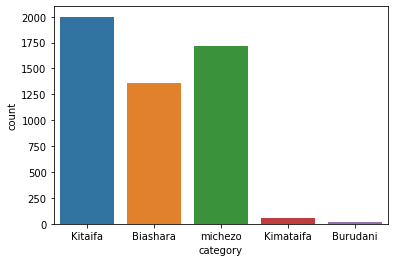

In [19]:
# Count plot of categorical column
#categories = {"Kitaifa": 0,"michezo": 1,"Biashara": 2,"Kimataifa": 3,"Burudani": 4}
sb.countplot(df_eda['category'])

In [20]:
#Checking the distribution of each label
#categories = {"Kitaifa": 0,"michezo": 1,"Biashara": 2,"Kimataifa": 3,"Burudani": 4}
df_eda['category'].value_counts()

Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: category, dtype: int64

In [21]:
# Checking the Most commom words
from collections import Counter

In [22]:
# Decided to tokenize the clean text column using the string split function to get word frequencies
import nltk
from nltk.tokenize import word_tokenize 

df_eda["clean_content"] =df_eda["clean_content"].apply(lambda x:str(x).split()) 
top = Counter([item for sublist in df_eda["clean_content"] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
0,mwaka,6595
1,serikali,5892
2,tanzania,4973
3,timu,4479
4,nchi,4233
5,hilo,4083
6,nchini,3983
7,hayo,3725
8,mkuu,3639
9,mchezo,3453


In [23]:
#Importing our graph libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [24]:
#A bar graph of the most common words in our texts
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [25]:
#Making a tree of the most common words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

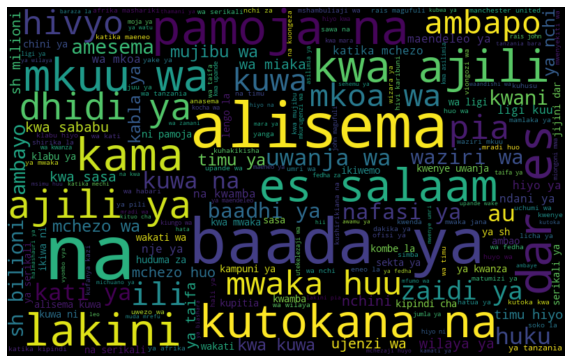

In [26]:
# Plot wordcloud image using WordCloud
#Importing wordcloud to create wordcloud diagrams
from wordcloud import WordCloud
all_words = ' '.join([text for text in train['clean_content']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Bivariate Analysis

In [27]:
#Selecting the Kitaifa category
Kitaifa = df_eda[df_eda['category']== 'Kitaifa']
Kitaifa.head()

,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,"[serikali, imesema, haitakuwa, tayari, kuona, ..."
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,"[serikali, imetoa, miezi, sita, taasisi, zote,..."
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,"[watanzania, wamekumbushwa, kusherehekea, siku..."
7,SW1004,IDADI ya vifo vya waendesha bodaboda nchini v...,Kitaifa,"[idadi, vifo, waendesha, bodaboda, nchini, vit..."
10,SW1009,"KWA mujibu wa vyanzo mbalimbali, Tanzania ina...",Kitaifa,"[mujibu, vyanzo, mbalimbali, tanzania, ina, ma..."


In [28]:
#Selecting the Biashara category
Biashara = df_eda[df_eda['category']== 'Biashara']
Biashara.head()

,id,content,category,clean_content
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,"[mkuu, mkoa, tabora, aggrey, mwanri, amesitish..."
6,SW1003,"Meneja Masoko na Mawasiliano wa taasisi hiyo,...",Biashara,"[meneja, masoko, mawasiliano, taasisi, ngula, ..."
8,SW1006,"Katika uzinduzi huo, rais amesema kuna haja y...",Biashara,"[uzinduzi, rais, amesema, kuna, haja, kutafuta..."
12,SW1010,SERIKALI ya Mapinduzi ya Zanzibar (SMZ) imewa...,Biashara,"[serikali, mapinduzi, zanzibar, smz, imewataka..."
13,SW1011,Akizungumza kwenye mkutano mkuu wa wanahisa u...,Biashara,"[akizungumza, mkutano, mkuu, wanahisa, uliofan..."


In [29]:
#Calculating the number of most common words that appear in the Biashara
top = Counter([item for sublist in Biashara["clean_content"] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,serikali,1682
1,mwaka,1658
2,nchi,1440
3,biashara,1330
4,huduma,1305
5,tanzania,1291
6,nchini,1136
7,kampuni,1117
8,hayo,1070
9,viwanda,1011


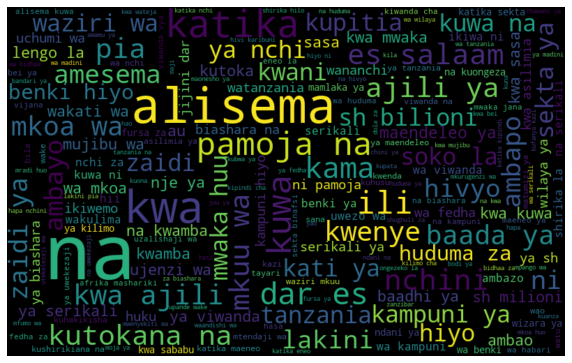

In [30]:
#Creating a word cloud for the biashara

from wordcloud import WordCloud
all_words_neg = ' '.join([text for text in train['clean_content'][train['category']== 'Biashara'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neg)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
#let's create some new columns showing character count, word count as well as average word length
train['word_count'] = train["clean_content"].apply(lambda x: len(str(x).split(" ")))
train['char_count'] = train["clean_content"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
train['avg_word_length'] = train['char_count'] / train['word_count']
train.head()

,id,content,category,clean_content,word_count,char_count,avg_word_length
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani...,233,1337,5.738197
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,mkuu wa mkoa wa tabora aggrey mwanri amesitis...,187,1101,5.887701
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,serikali imetoa miezi sita kwa taasisi zote z...,394,2188,5.553299
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,kampuni ya mchezo wa kubahatisha ya mbet imei...,213,1173,5.507042
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,watanzania wamekumbushwa kusherehekea sikukuu...,336,1874,5.577381


## Tokenization

In [32]:
#Importing word tokenizer to tokenize our words into individual words 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
df['clean_content'] = df['clean_content'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
#I chose to Lemmatize thank to stemm due to the nature of our analysis, the benefit of 
#lemmetization is that it converts the words into there base format. 
#Runs, Ran, Running are all converted to Run which is prefarable 
# to stemming which leaves thw words in an incomplete state
#https://www.baeldung.com/cs/stemming-vs-lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
df['clean_content'] = df['clean_content'].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,"[serikali, imesema, haitakuwa, tayari, kuona, ..."
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,"[mkuu, mkoa, tabora, aggrey, mwanri, amesitish..."
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,"[serikali, imetoa, miezi, sita, taasisi, zote,..."
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,"[kampuni, mchezo, kubahatisha, mbet, imeingia,..."
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,"[watanzania, wamekumbushwa, kusherehekea, siku..."
...,...,...,...,...
5146,SW993,RAIS John Magufuli ameendelea kung’ara katika...,Kitaifa,"[rais, john, magufuli, ameendelea, kung, ’, ar..."
5147,SW994,KAMPENI inayohimiza watafi ti kuandika upya h...,Kitaifa,"[kampeni, inayohimiza, watafi, ti, kuandika, u..."
5148,SW996,"MATUKIO mapya ya malaria kwa kila watu 1,000 ...",Kitaifa,"[matukio, mapya, malaria, 1000, jamii, yamepun..."
5149,SW997,IMEELEZWA kuwa hakuna sheria yoyote inayokata...,Kitaifa,"[imeelezwa, hakuna, sheria, inayokataza, taari..."


In [34]:
#Checking the number of classes

df['category'].value_counts()

Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: category, dtype: int64

In [35]:
# creating a mapping dictionary that maps the category values from 0 to 5
category_mapping = {"Kitaifa": 0,"michezo": 1,"Biashara": 2,"Kimataifa": 3,"Burudani": 4}

df["category"] = df.category.map(category_mapping)

df.sample(5)

,id,content,category,clean_content
1697,SW2910,Mkurugenzi wa Masoko wa Kampuni ya Bia ya Ser...,2,"[mkurugenzi, masoko, kampuni, bia, serengeti, ..."
4736,SW6314,"Kwa mujibu wa uchambuzi huo, mikataba ya kuga...",2,"[mujibu, uchambuzi, mikataba, kugawana, mapato..."
987,SW2114,MAOFISA Tarafa nchini wametakiwa kusimamia kw...,0,"[maofisa, tarafa, nchini, wametakiwa, kusimami..."
220,SW1253,"MSHAMBULIAJI wa zamani wa Gor Mahia, Meddie K...",1,"[mshambuliaji, zamani, gor, mahia, meddie, kag..."
3415,SW4830,Utaratibu huo ulioanza kutumika tangu mwezi J...,2,"[utaratibu, ulioanza, kutumika, tangu, mwezi, ..."


## Cleaning the test dataset

In [36]:
#Creating a copy of test dataset
df1=test.copy()
df1.head(5)

,swahili_id,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGP...
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema seri..."


In [37]:
# test dataset preprocessing
#Removing links 
df1['clean_content'] = df1["content"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))

#Changing all the letter to lower case
df1['clean_content'] = df1.content.map(lambda x: x.lower())

#Removing the punctuation
df1['clean_content'] = df1['clean_content'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

#Replacing â€ ̃ , â€™", () with ' '

df1['clean_content'] = df1['clean_content'].replace("â€ ̃ ", " ")
df1['clean_content'] = df1['clean_content'].replace("â€™", ' ')
df1['clean_content'] = df1['clean_content'].replace("()", ' ')

# to remove stop words
df1['clean_content'] = df1['clean_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# to tokenize
df1['clean_content'] =df1['clean_content'].apply(lambda x:str(x).split()) 

# to normalize the data using lemmatization
df1['clean_content'] = df1['clean_content'].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df1.head()

,swahili_id,content,clean_content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah...","[mkuu, wilaya, bahi, mkoani, dodoma, mwanahami..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,...","[mwishoni, wiki, timu, soka, taifa, taifa, sta..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...,"[thamani, mauzo, bidhaa, afrika, mashariki, um..."
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGP...,"[meneja, mawasiliano, utetezi, asasi, agpahi, ..."
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema seri...","[waziri, kilimo, japhet, hasunga, amesema, ser..."


## Data Modeling

### Handling the class imbalance

In [38]:
#Link explaining how to deal with class imbalance
# https://www.analyticsvidhya.com/blog/2020/11/handling-imbalanced-data-machine-learning-computer-vision-and-nlp/
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#https://machinelearningmastery.com/multi-class-imbalanced-classification/

In [39]:
!pip install imbalanced-learn

In [40]:
#Importing the library
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [41]:
#Vectorization is used to to convert a collection of text docs to a vector of term/token counts
#These words need to then be encoded as integers, or floating-point values, for use as inputs in
# machine learning algorithms. This process is called feature extraction (or vectorization).
# link https://towardsdatascience.com/tf-idf-simplified-aba19d5f5530

#Importing our Modelling libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=12000)
# TF-IDF feature matrix
df['clean_content'] = df['clean_content'].apply(lambda x: ' '.join(x))

X = tf_idf.fit_transform(df['clean_content'])
X

<5151x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 597487 stored elements in Compressed Sparse Row format>

In [42]:
#converting it to an array
X = X.toarray()

Class=0, n=2000 (20.000%)
Class=2, n=2000 (20.000%)
Class=1, n=2000 (20.000%)
Class=3, n=2000 (20.000%)
Class=4, n=2000 (20.000%)


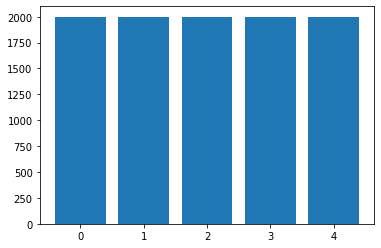

In [43]:
# split into input and output elements
X, y = X, df['category']
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
from matplotlib import pyplot
 # plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

class 0 which is kimataifa had 2000 values before and after sampling the dataset the classes are now equal.

In [44]:
y.value_counts()

0    2000
2    2000
1    2000
3    2000
4    2000
Name: category, dtype: int64

In [45]:
#let's try to resample our data
# Separating classes)
#from sklearn.utils import resample
#Kitaifa = df[df.category == 0]
#michezo = df[df.category == 1]
#Biashara = df[df.category == 2]
#Kimataifa = df[df.category == 3]
#Burudani = df[df.category == 4]

# Oversampling  
#oversampl = resample(spam,replace=True,n_samples=len(not_spam), random_state=42)
#oversampl = resample(positive,replace=True,n_samples=len(negative), random_state=42)
#oversampled = pd.concat([not_spam, oversampl])
#oversampled = pd.concat([negative, oversampl])
#df = oversampled.copy()

In [46]:
#Importing our Modelling libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Multinomial Naive Bayes Classifier

In [47]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [48]:
#Building the first model

modelNB = MultinomialNB().fit(X_train, y_train)
predicted = modelNB.predict(X_test)
report = classification_report( y_test, predicted )
print(report)
acc=accuracy_score(y_test,predicted)

              precision    recall  f1-score   support

           0       0.87      0.73      0.80       400
           1       0.97      0.90      0.94       387
           2       0.80      0.96      0.87       397
           3       0.98      1.00      0.99       397
           4       0.99      1.00      1.00       419

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [49]:
tf_idf = TfidfVectorizer(max_features=12000)
# TF-IDF feature matrix
df1['clean_content'] = df1['clean_content'].apply(lambda x: ' '.join(x))

b = tf_idf.fit_transform(df1['clean_content'] )
b

<1288x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 152664 stored elements in Compressed Sparse Row format>

In [50]:
b = b.toarray()

In [51]:
#Making predictions 

y_pred=modelNB.predict(b)
y_pred

array([1, 2, 0, ..., 2, 0, 2])

In [52]:
#Converting the predictions to a dataframe
output = pd.DataFrame({'swahili_id': df1.swahili_id	,'category': y_pred})
output.head(3)

# a mapping dictionary that maps the category values from 0 to 5 back to the categories
category_mapping = {0:"Kitaifa",1:"michezo", 2:"Biashara", 3:"Kimataifa", 4:"Burudani"}

output["category"] = output.category.map(category_mapping)

output.sample(5)
output.to_csv('submission.csv', index=False)


In [53]:
#Previewing the submission file
pd.read_csv('/content/submission.csv')

,swahili_id,category
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,michezo
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,Biashara
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,Kitaifa
3,00868eeee349e286303706ef0ffd851f39708d37,Biashara
4,00a5cb12d3058dcf2e42f277eee599992db32412,Kitaifa
...,...,...
1283,feb4b0ae88524c9cee3e50f2301d84a235f3c607,michezo
1284,fecf3f14f47237e02721ed4baa4eb6c11abd239f,Kitaifa
1285,feed09e13586d12139cd59bc20996a4d29706606,Biashara
1286,ffc0bca6fde8fa0cce1ac3a7b0d746603d441bf8,Kitaifa


In [54]:
#Previewing the shape of the prediction
output.shape

(1288, 2)

In [55]:
output.isnull().sum()

swahili_id    0
category      0
dtype: int64

Random Forest Classifier

In [56]:
#start by splitting our dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

#Train the model
modelRF = RandomForestClassifier().fit(X_train, y_train)
#Mking prediction
predicted = modelRF.predict(X_test)

#classification report
report = classification_report( y_test, predicted )
print(report)
acc=accuracy_score(y_test,predicted)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       400
           1       0.97      0.95      0.96       387
           2       0.84      0.90      0.87       397
           3       0.99      1.00      1.00       397
           4       1.00      1.00      1.00       419

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



Random Forest has a higher accuracy of 93% compared to the Multinomial Naive Bayes Model

Linear Support Vector Model

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
#Training the model
from sklearn.svm import LinearSVC 
model = LinearSVC().fit(X_train, y_train)

#Makingpredictions
predicted = model.predict(X_test)

#Classification report
report = classification_report( y_test, predicted )
print(report)
acc=accuracy_score(y_test,predicted)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       400
           1       0.97      0.96      0.96       387
           2       0.85      0.92      0.88       397
           3       0.99      1.00      1.00       397
           4       0.98      1.00      0.99       419

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



## BERT Modelling

BERT is a transformer-based machine learning technique for natural language processing pre-training developed by Google

In [58]:
# Pip install for tensor flow text
!pip install tensorflow_text
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

     |████████████████████████████████| 4.9 MB 5.4 MB/s 
     |████████████████████████████████| 462 kB 45.0 MB/s 


In [59]:
#Importing our tensor flow libraries 
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [60]:
tf_idf = TfidfVectorizer(max_features=12000)
# TF-IDF feature matrix
df['clean_content'] = df['clean_content'].apply(lambda x: ' '.join(x))


In [61]:
#Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(df['clean_content'], df['category'], test_size=0.2, random_state=69)

In [62]:
#Importing our bert preprocess and encoder layes 
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [63]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [64]:
#Setting the metrics and compline our models with its parameters
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [65]:
#Evaluating our model
model.evaluate(X_test, y_test)

33/33 [==============================] - 465s 14s/step - loss: 0.8461 - accuracy: 0.4025 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.8461254835128784, 0.4025218188762665, 0.0, 0.0]

In [66]:
#Creating our predictions with the model
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [67]:
#As the predictions are floats we have to convert them into a binary format 
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
#The predictions confusion matrix
print(confusion_matrix(y_test, y_predicted))

[[415   0   0   0   0]
 [331   0   0   0   0]
 [268   0   0   0   0]
 [ 12   0   0   0   0]
 [  5   0   0   0   0]]


In [69]:
#Checking the accuracy of models
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57       415
           1       0.00      0.00      0.00       331
           2       0.00      0.00      0.00       268
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         5

    accuracy                           0.40      1031
   macro avg       0.08      0.20      0.11      1031
weighted avg       0.16      0.40      0.23      1031



Linear SVM is the best Model